# Input

In [1]:
path2test_files_dir = 'test/audio'
path2train_files_dir = 'train/audio'

# Import
* github doesn't show bokeh graphs on jupyter. so show them as png images if saving for github
* builtins: https://stackoverflow.com/questions/3720740/pass-variable-on-import
* bokeh in jupyter: https://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html

In [2]:
import builtins  # Not needed unless saving for github
builtins.use_bokeh_screenshot = True  # Not needed unless saving for github

from kaggle_speech_recog.speech_classes import *
import os

from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# Data overview

In [3]:
test = SpeechList(name='Test')
train = SpeechList(name='Train')

# Test files
for file in os.listdir(path2test_files_dir):
    speech = Speech(path2test_files_dir + '/' + file)
    test.append(speech)

# Train files
for sub_dir in os.listdir(path2train_files_dir):
    path2sub_dir = path2train_files_dir + '/' + sub_dir
    if os.path.isfile(path2sub_dir):
        continue
    for file in os.listdir(path2sub_dir):
        speech = Speech(path2sub_dir + '/' + file, is_test=False, label=sub_dir)
        train.append(speech)

In [4]:
print('# of test files: {:,}'.format(len(test)))
print('# of train files: {:,}'.format(len(train)))
train_label_dict = train.get_file_count_per_label()
print(['{}: {:,}'.format(label, train_label_dict[label]) for label in sorted(train_label_dict)])

# of test files: 158,538
# of train files: 64,728
['_background_noise_: 7', 'bed: 1,713', 'bird: 1,731', 'cat: 1,733', 'dog: 1,746', 'down: 2,359', 'eight: 2,352', 'five: 2,357', 'four: 2,372', 'go: 2,372', 'happy: 1,742', 'house: 1,750', 'left: 2,353', 'marvin: 1,746', 'nine: 2,364', 'no: 2,375', 'off: 2,357', 'on: 2,367', 'one: 2,370', 'right: 2,367', 'seven: 2,377', 'sheila: 1,734', 'six: 2,369', 'stop: 2,380', 'three: 2,356', 'tree: 1,733', 'two: 2,373', 'up: 2,375', 'wow: 1,745', 'yes: 2,377', 'zero: 2,376']


# Read audio files as numpy arrays
* read wav file into numpy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [5]:
test.get_wav_data()
print('=' * 50)
train.get_wav_data()

[ Test ]
Getting wav data started @ 12/15/2017 16:31:55
Completed 50,000 data @ 12/15/2017 16:31:58 (0 min 3 sec passed)
Completed 100,000 data @ 12/15/2017 16:32:02 (0 min 7 sec passed)
Completed 150,000 data @ 12/15/2017 16:32:05 (0 min 10 sec passed)
Completed all data @ 12/15/2017 16:32:06 (0 min 10 sec passed)
[ Train ]
Getting wav data started @ 12/15/2017 16:32:06
SKIPPED train/audio/_background_noise_/README.md File format b'# Ba'... not understood.
Completed 50,000 data @ 12/15/2017 16:32:09 (0 min 2 sec passed)


/usr/local/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Completed all data @ 12/15/2017 16:32:09 (0 min 3 sec passed)


In [6]:
# Remove the file that got skipped
non_wav_file_path = 'train/audio/_background_noise_/README.md'
train.remove_speech_by_file_path(non_wav_file_path)

# This file sounds and looks like?

three, train/audio/three/bfa63751_nohash_0.wav, sample rate 16000, data length 16000


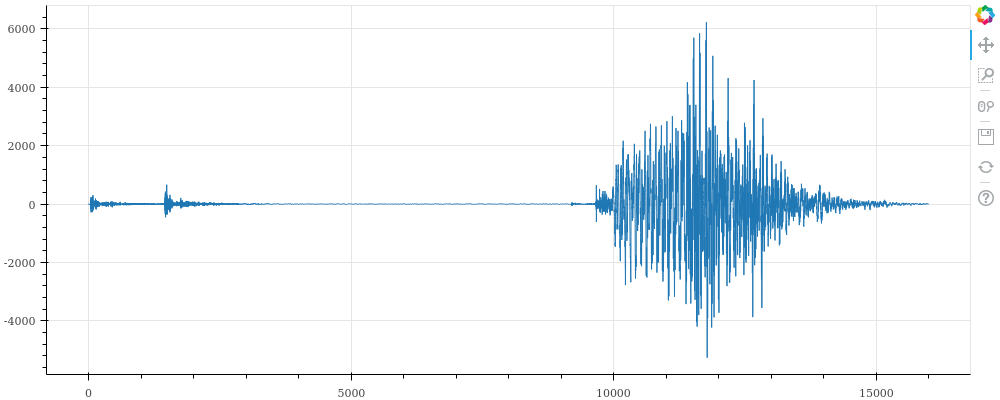

In [7]:
speech = train.get_random()  # if no label is specified, get random from all speeches
speech.hear_and_see()

# Stats
* numpy histogram: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html
* bokeh tick formatting: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#tick-label-formats

Most often data size: 16,000 (90.00% of Train set i.e. 58,252 out of 64,727 files)
Less than data size 16,000: 9.99% of Train set i.e. 6,469 out of 64,727 files
More than data size 16,000: 0.01% of Train set i.e. 6 out of 64,727 files


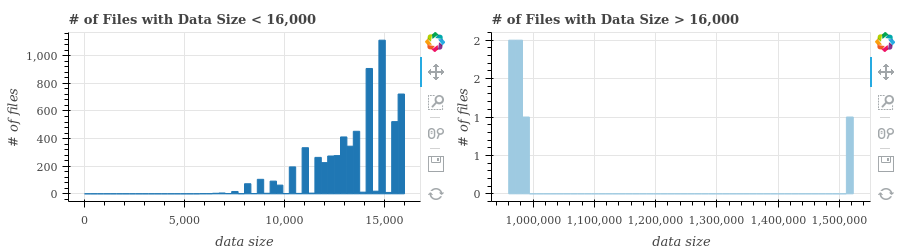

In [8]:
train.get_stats()

In [9]:
test.get_stats()

All 158,538 files are data size 16,000


In [10]:
sample_rate_list = []
for speech in (train + test):
    sample_rate_list.append(speech.sample_rate)
print('Sample rate set: {}'.format(set(sample_rate_list)))

Sample rate set: {16000}
